In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

# load the dataset
file_path = "/Users/kostaskes/Documents/code/Projects/Activities.csv"
df = pd.read_csv(file_path)

# this will allow printing all rows and all columns 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)

In [117]:
# display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Activity Type      1978 non-null   object
 1   Date               1978 non-null   object
 2   Title              1978 non-null   object
 3   Distance           1978 non-null   object
 4   Calories           1978 non-null   object
 5   Time               1978 non-null   object
 6   Avg HR             1978 non-null   object
 7   Max HR             1978 non-null   object
 8   Aerobic TE         1978 non-null   object
 9   Avg Speed          1978 non-null   object
 10  Max Speed          1978 non-null   object
 11  Total Ascent       1978 non-null   object
 12  Total Descent      1978 non-null   object
 13  Avg Stride Length  1978 non-null   object
 14  Steps              1978 non-null   object
 15  Min Temp           1978 non-null   object
 16  Best Lap Time      1978 non-null   object


In [118]:
# display first 5 rows
df.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Speed,Max Speed,Total Ascent,Total Descent,Avg Stride Length,Steps,Min Temp,Best Lap Time,Max Temp,Avg Resp,Min Resp,Max Resp,Moving Time,Elapsed Time,Min Elevation,Max Elevation
0,Strength Training,2023-07-16 08:33:30,Strength,0.00,99,00:39:16,69,100,0.1,--,--,--,--,--,8,32.0,00:39:16,33.0,--,--,--,00:39:16,00:39:16,--,--
1,Strength Training,2023-06-30 15:06:33,Strength,0.00,99,00:39:35,69,102,0.1,--,--,--,--,--,12,31.0,00:39:35,33.0,--,--,--,00:39:35,00:39:35,--,--
2,Yoga,2024-03-22 08:12:44,Yoga,--,99,00:20:51,90,105,0.2,--,--,--,--,--,--,30.0,00:20:51,31.0,15,11,17,00:20:51,00:20:51,--,--
3,Yoga,2023-04-12 21:39:00,Yoga,--,99,00:46:20,69,98,0.0,--,--,--,--,--,44,27.0,00:46:20,31.0,19,12,22,00:46:20,00:46:20,--,--
4,Yoga,2022-11-16 21:49:35,Yoga,--,99,00:40:25,70,92,0.1,--,--,--,--,--,--,29.0,00:40:25,31.0,16,12,20,00:40:25,00:40:25,--,--


Make all necessary conversions to data types

In [119]:
# convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# extract Year, Month, Month_Name, Year_Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()
df['Year_Month'] = df['Date'].dt.to_period('M').astype(str) 

# extract hour and minute as 'Time_of_the_day'
df['Time_of_the_day'] = df['Date'].dt.strftime('%H:%M')

# change 'Distance' data type to numeric
df['Distance'] = pd.to_numeric(df['Distance'], errors='coerce')
# replace 0 in the 'Distance' column with NaN
df['Distance'] = df['Distance'].replace(0, float('nan'))

# convert 'Time' column to timedelta
df['Time'] = pd.to_timedelta(df['Time'], errors='coerce')



In [120]:
# columns to change datatype to numeric
columns_to_convert = [
    'Calories', 'Avg HR', 'Max HR', 'Aerobic TE', 'Total Ascent', 
    'Total Descent', 'Steps', 'Avg Resp', 'Min Resp', 'Max Resp', 
    'Min Elevation', 'Max Elevation'
]

# apply the conversion to all specified columns
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [121]:
# extract day of the week
df['Day_of_Week'] = df['Date'].dt.day_name()

In [122]:
# add a column to indicate if the run was on a weekend
df['is_weekend'] = df['Date'].dt.dayofweek >= 5  # Saturday=5, Sunday=6

Check when was the first and last date of activity

In [123]:
print(df['Date'].min())
print(df['Date'].max())

2019-01-24 18:30:08
2025-02-11 08:12:19


The dataset spans from January 24, 2019 to February 11, 2025,
covering over 6 years of activity data.


In [124]:
# check if all convertions were made 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Activity Type      1978 non-null   object         
 1   Date               1978 non-null   datetime64[ns] 
 2   Title              1978 non-null   object         
 3   Distance           1377 non-null   float64        
 4   Calories           1977 non-null   float64        
 5   Time               1978 non-null   timedelta64[ns]
 6   Avg HR             1972 non-null   float64        
 7   Max HR             1935 non-null   float64        
 8   Aerobic TE         1445 non-null   float64        
 9   Avg Speed          1978 non-null   object         
 10  Max Speed          1978 non-null   object         
 11  Total Ascent       1288 non-null   float64        
 12  Total Descent      1299 non-null   float64        
 13  Avg Stride Length  1978 non-null   object       

In [125]:
# get unique 'Activity Type' 
activity_types = df['Activity Type'].unique()

# print the unique activity types
print(activity_types)

['Strength Training' 'Yoga' 'Other' 'Gym & Fitness Equipment' 'HIIT'
 'Elliptical' 'Cardio' 'Indoor Cycling' 'Cycling' 'Walking' 'Hiking'
 'Trail Running' 'Casual Walking' 'Resort Skiing/Snowboarding'
 'Stand Up Paddleboarding' 'Open Water Swimming' 'Running'
 'Treadmill Running' 'Multisport']


In [126]:
# count the number of activities for each activity type
activity_counts = df['Activity Type'].value_counts()

# print the counts
print(activity_counts)


Activity Type
Running                       623
Walking                       587
Strength Training             339
Yoga                           98
Other                          84
Gym & Fitness Equipment        66
Trail Running                  42
Hiking                         32
Elliptical                     28
Open Water Swimming            22
Cycling                        16
HIIT                           12
Treadmill Running               8
Cardio                          6
Resort Skiing/Snowboarding      6
Indoor Cycling                  4
Stand Up Paddleboarding         2
Multisport                      2
Casual Walking                  1
Name: count, dtype: int64


In [127]:
# filter all running activities
running_activities = df[df['Activity Type'].isin(['Running', 'Trail Running', 'Treadmill Running'])]

# sort the running activities by date in descending order
running_activities = running_activities.sort_values(by='Date', ascending=False)

# count the total number of runs
total_runs = running_activities.shape[0]

print(f"Total running activities since 2019: {total_runs} ")


Total running activities since 2019: 673 


In [128]:
# sum the total distance run in all activities
total_distance = running_activities['Distance'].sum()
total_distance

5099.59

In [129]:
running_activities['Distance'].describe()

count    673.000000
mean       7.577400
std        4.396208
min        2.000000
25%        5.160000
50%        6.580000
75%        8.190000
max       43.680000
Name: Distance, dtype: float64

In [130]:
total_ascent = running_activities['Total Ascent'].sum()
total_ascent

79122.0

You’ve ascended a total of 79,122 meters while running, which is like climbing Mount Everest about 8.5 times.
and/or equivalent to climbing the Empire State Building about 2,624 times.

In [131]:
# total calories burned while running
total_calories = running_activities['Calories'].sum()
print(f"Total calories burned: {total_calories:.0f}")


Total calories burned: 415124


In [132]:
pizza_equivalent = total_calories / 2300
print(f"That's about {pizza_equivalent:.1f} whole pizzas burned!")

That's about 180.5 whole pizzas burned!


In [133]:
running_activities.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Speed,Max Speed,Total Ascent,Total Descent,Avg Stride Length,Steps,Min Temp,Best Lap Time,Max Temp,Avg Resp,Min Resp,Max Resp,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Year,Month,Month_Name,Year_Month,Time_of_the_day,Day_of_Week,is_weekend
1922,Treadmill Running,2024-12-13 16:25:04,Treadmill Running,4.73,539.0,0 days 00:35:01,163.0,187.0,4.4,7:24,5:35,NaN,NaN,0.89,5264.0,26.0,00:06:08.8,31.0,NaN,NaN,NaN,00:32:53,00:35:01,NaN,NaN,2024,12,December,2024-12,16:25,Friday,False
1920,Treadmill Running,2024-11-21 18:37:10,Treadmill Running,4.13,423.0,0 days 00:30:08,147.0,170.0,3.4,7:18,5:50,NaN,NaN,0.89,4504.0,26.0,00:03:50.6,30.0,NaN,NaN,NaN,00:28:07,00:30:08,NaN,NaN,2024,11,November,2024-11,18:37,Thursday,False
1917,Running,2024-04-07 10:26:51,Thessaloniki Running,8.34,696.0,0 days 01:00:01,131.0,143.0,2.5,7:12,6:23,8.0,11.0,0.86,9724.0,24.0,00:02:40.0,30.0,NaN,NaN,NaN,00:59:59,01:00:01,2.0,14.0,2024,4,April,2024-04,10:26,Sunday,True
1715,Running,2024-04-03 20:36:42,Eleftherio-Kordelio Running,5.96,512.0,0 days 00:34:20,145.0,167.0,3.3,5:46,4:19,53.0,46.0,1.04,5680.0,23.0,00:01:21.8,29.0,NaN,NaN,NaN,00:34:17,00:34:34,41.0,74.0,2024,4,April,2024-04,20:36,Wednesday,False
1899,Running,2024-04-01 19:30:51,Eleftherio-Kordelio Running,4.52,426.0,0 days 00:31:02,143.0,171.0,3.0,6:52,2:56,66.0,66.0,0.98,4628.0,21.0,00:00:22.8,27.0,NaN,NaN,NaN,00:30:49,00:32:29,47.0,79.0,2024,4,April,2024-04,19:30,Monday,False


Races

In [134]:
# filter rows where 'Title' contains the word 'race' 
race_activities = df[df['Title'].str.contains('race', case=False, na=False)]

# sort by date
race_activities.sort_values(by='Date')

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Speed,Max Speed,Total Ascent,Total Descent,Avg Stride Length,Steps,Min Temp,Best Lap Time,Max Temp,Avg Resp,Min Resp,Max Resp,Moving Time,Elapsed Time,Min Elevation,Max Elevation,Year,Month,Month_Name,Year_Month,Time_of_the_day,Day_of_Week,is_weekend
1262,Running,2019-04-14 08:45:00,14th ATG RUN - 10K - RACE,10.00,956.0,0 days 00:46:42,177.0,NaN,NaN,4:40,--,NaN,NaN,--,NaN,--,--:--:--,--,NaN,NaN,NaN,--:--:--,00:46:42,NaN,NaN,2019,4,April,2019-04,08:45,Sunday,True
1655,Trail Running,2021-10-17 11:21:23,1st LIVADI TRAIL RUN - RACE,16.87,1516.0,0 days 01:35:22,166.0,185.0,NaN,5:39,3:18,617.0,636.0,1.09,15626.0,19.0,00:04:13.7,28.0,NaN,NaN,NaN,01:34:30,01:35:22,630.0,968.0,2021,10,October,2021-10,11:21,Sunday,True
1808,Trail Running,2021-11-28 09:05:00,6th SIZATHLOS SEIH SOU - RACE,28.04,2611.0,0 days 02:49:19,168.0,183.0,5.0,6:02,3:09,1121.0,1115.0,1.06,27172.0,17.0,00:00:53.6,27.0,NaN,NaN,NaN,02:46:34,02:49:19,105.0,531.0,2021,11,November,2021-11,09:05,Sunday,True
1425,Running,2022-04-10 08:00:46,16th ATG MARATHON - RACE,42.47,3352.0,0 days 03:43:22,164.0,193.0,5.0,5:16,4:10,116.0,156.0,1.09,38984.0,18.0,00:04:27.2,32.0,NaN,NaN,NaN,03:41:18,03:43:22,2.0,50.0,2022,4,April,2022-04,08:00,Sunday,True
1261,Running,2022-05-07 13:00:05,5th THEAGENIOS THASOS - RACE,18.95,1511.0,0 days 01:27:11,170.0,191.0,5.0,4:36,3:37,269.0,211.0,1.20,15752.0,24.0,00:03:56.8,32.0,NaN,NaN,NaN,01:26:57,01:27:11,4.0,78.0,2022,5,May,2022-05,13:00,Saturday,True
1862,Trail Running,2022-07-10 10:29:22,2nd LIVADI TRAIL - RACE,21.51,1933.0,0 days 02:16:14,164.0,183.0,5.0,6:20,3:31,805.0,801.0,1.01,21444.0,25.0,00:03:47.5,32.0,NaN,NaN,NaN,02:11:00,02:16:14,646.0,976.0,2022,7,July,2022-07,10:29,Sunday,True
1921,Trail Running,2022-09-11 09:00:41,4th NAOUSA VERMIO TRAIL - RACE,24.47,2338.0,0 days 02:58:59,160.0,177.0,5.0,7:19,3:49,1307.0,1298.0,0.90,27622.0,24.0,00:02:32.9,34.0,35.0,18.0,43.0,02:54:43,02:58:59,481.0,1252.0,2022,9,September,2022-09,09:00,Sunday,True
1223,Trail Running,2022-10-02 09:11:12,3rd GOUMAROSTALI VERTICAL MILE - RACE,4.80,1500.0,0 days 01:36:44,161.0,169.0,4.9,20:09,6:21,1519.0,2.0,2.17,2988.0,20.0,00:17:44,25.0,36.0,13.0,45.0,00:38:02,01:36:44,1079.0,2600.0,2022,10,October,2022-10,09:11,Sunday,True
1931,Trail Running,2022-11-13 10:39:33,10th PAIKO HALF-MARATHON - RACE,20.27,2256.0,0 days 02:37:41,157.0,181.0,4.9,7:47,3:28,1148.0,1142.0,0.91,22972.0,15.0,00:01:00.4,24.0,NaN,NaN,NaN,02:34:56,02:37:41,730.0,1352.0,2022,11,November,2022-11,10:39,Sunday,True
1011,Trail Running,2023-01-22 08:00:20,ROGKAS - RACE,35.11,3680.0,0 days 06:52:08,122.0,169.0,5.0,11:44,4:29,2397.0,2396.0,1.19,41540.0,11.0,00:04:29.3,23.0,NaN,NaN,NaN,05:37:03,06:52:10,275.0,1474.0,2023,1,January,2023-01,08:00,Sunday,True


In [135]:
# extract hour from the datetime
running_activities['Hour'] = running_activities['Date'].dt.hour

# count runs per hour
hour_counts = running_activities['Hour'].value_counts().sort_index()

# display the counts
print(hour_counts)

# most common hour
most_common_hour = hour_counts.idxmax()
print(f"\nMost common time for a run is around {most_common_hour}:00")


Hour
6      16
7     160
8      76
9      80
10     66
11     40
12     12
13     15
14      7
15     12
16     15
17     26
18     51
19     52
20     26
21     15
22      4
Name: count, dtype: int64

Most common time for a run is around 7:00


🕖 The most common time for my runs is around 7:00 AM — specifically between 7:00 to 7:59. 
This makes perfect sense because I usually prefer to go running first thing in the morning before work. 
It helps me start the day with a clear mind and a great energy boost.


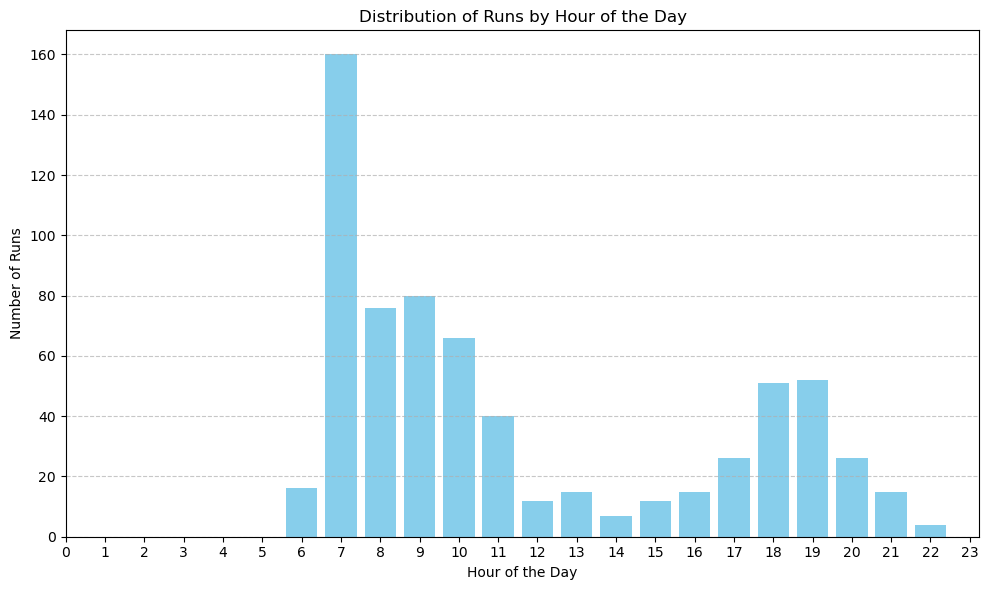

In [136]:
# extract the hour from your existing DataFrame
running_activities['Hour'] = running_activities['Date'].dt.hour

# count how many runs happened at each hour
hour_counts = running_activities['Hour'].value_counts().sort_index()

# plot
plt.figure(figsize=(10, 6))
plt.bar(hour_counts.index, hour_counts.values, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Runs')
plt.title('Distribution of Runs by Hour of the Day')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [137]:
# Basic time stats
print(running_activities['Time'].describe())


count                          673
mean     0 days 00:44:32.731054977
std      0 days 00:34:49.504914134
min                0 days 00:10:26
25%                0 days 00:30:00
50%                0 days 00:36:00
75%                0 days 00:46:07
max                0 days 07:35:22
Name: Time, dtype: object


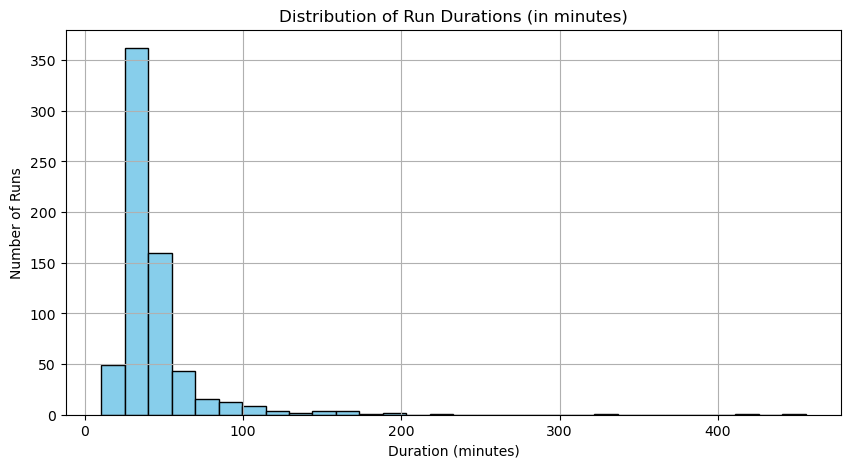

In [138]:

# Convert timedelta to minutes for visualization
durations_in_minutes = running_activities['Time'].dt.total_seconds() / 60

plt.figure(figsize=(10, 5))
plt.hist(durations_in_minutes, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Run Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Runs')
plt.grid(True)
plt.show()


In [139]:
# count by day
day_counts = running_activities['Day_of_Week'].value_counts().sort_index()
print(day_counts)

# most frequent day
most_common_day = day_counts.idxmax()
print(f"\nMost common day for a run: {most_common_day}")

Day_of_Week
Friday        90
Monday        79
Saturday      99
Sunday       104
Thursday     110
Tuesday      104
Wednesday     87
Name: count, dtype: int64

Most common day for a run: Thursday


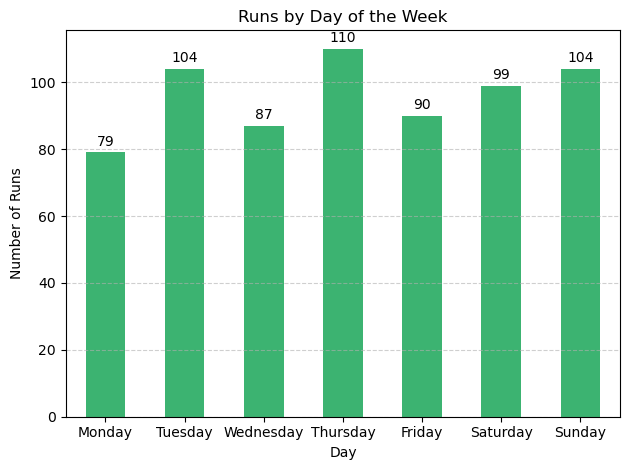

In [140]:
# Define the correct order of weekdays
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the day_counts Series to follow this order
day_counts = day_counts.reindex(ordered_days)

# Create the plot
ax = day_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Runs by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Runs')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add values on top of bars
for i, value in enumerate(day_counts):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [141]:
# Only keep running and trail running activities
run_data = running_activities.copy()

# Drop any runs missing distance or time
run_data = run_data.dropna(subset=['Distance', 'Time'])

# Convert 'Time' from timedelta to minutes
run_data['Duration_Minutes'] = run_data['Time'].dt.total_seconds() / 60

# Features for clustering
X = run_data[['Distance', 'Duration_Minutes']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

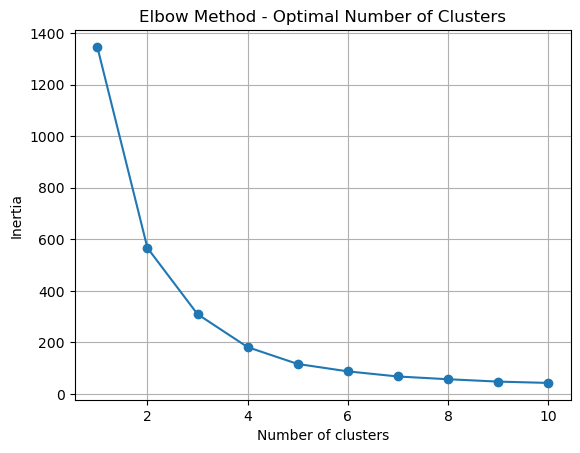

In [142]:
inertia = []

# Try 1 to 10 clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [143]:
# Apply KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
run_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Add cluster centroids to the dataframe (for plotting)
centroids = kmeans.cluster_centers_

# Reverse the scaling transformation to get the real values of the centroids
centroids_real = scaler.inverse_transform(centroids)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


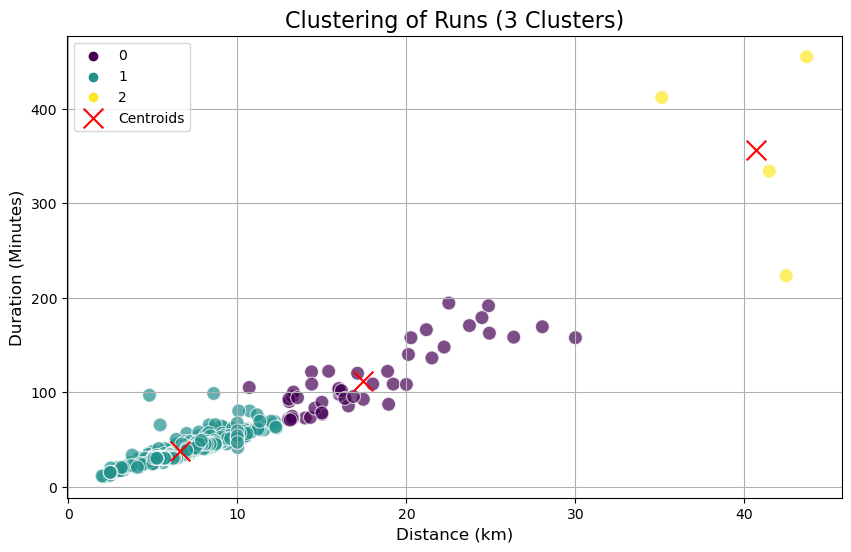

In [144]:
# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=run_data['Distance'], y=run_data['Duration_Minutes'], 
                hue=run_data['Cluster'], palette='viridis', s=100, alpha=0.7)

# Plot centroids
plt.scatter(centroids_real[:, 0], centroids_real[:, 1], 
            c='red', marker='x', s=200, label='Centroids')

# Labels and title
plt.title('Clustering of Runs (3 Clusters)', fontsize=16)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Duration (Minutes)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [145]:
# Print the centroids (real scale)
print("Centroids of the clusters (Distance, Duration):")
for i, centroid in enumerate(centroids_real):
    print(f"Cluster {i+1}: Distance = {centroid[0]:.2f} km, Duration = {centroid[1]:.2f} minutes")


Centroids of the clusters (Distance, Duration):
Cluster 1: Distance = 17.45 km, Duration = 111.56 minutes
Cluster 2: Distance = 6.58 km, Duration = 37.24 minutes
Cluster 3: Distance = 40.68 km, Duration = 356.25 minutes
